# Vivan Technology
This Dataset explore Vivan Technology's Employee data. We wil be exploring:
1. The recruiment source with the highest hire.
2. What position has the highest hire.
3. Calculate the ratio of male and female hires.
4. Get the correlation between gender and position.

In [1]:
#import the libraries
import pandas as pd
import seaborn as sns
import numpy as np

import matplotlib
import matplotlib.pyplot as plt
plt.style.use('ggplot')
from matplotlib.pyplot import figure

%matplotlib inline
matplotlib.rcParams['figure.figsize'] = (12,8)

In [2]:
#Let's import the dataset
df = pd.read_csv('HRDataset.csv')
df.head()

,Employee_Name,EmpID,MarriedID,MaritalStatusID,GenderID,EmpStatusID,DeptID,PerfScoreID,FromDiversityJobFairID,Salary,...,ManagerName,ManagerID,RecruitmentSource,PerformanceScore,EngagementSurvey,EmpSatisfaction,SpecialProjectsCount,LastPerformanceReview_Date,DaysLateLast30,Absences
0,"Adinolfi, Wilson K",10026,0,0,1,1,5,4,0,62506,...,Michael Albert,22.0,LinkedIn,Exceeds,4.60,5,0,1/17/2019,0,1
1,"Ait Sidi, Karthikeyan",10084,1,1,1,5,3,3,0,104437,...,Simon Roup,4.0,Indeed,Fully Meets,4.96,3,6,2/24/2016,0,17
2,"Akinkuolie, Sarah",10196,1,1,0,5,5,3,0,64955,...,Kissy Sullivan,20.0,LinkedIn,Fully Meets,3.02,3,0,5/15/2012,0,3
3,"Alagbe,Trina",10088,1,1,0,1,5,3,0,64991,...,Elijiah Gray,16.0,Indeed,Fully Meets,4.84,5,0,1/3/2019,0,15
4,"Anderson, Carol",10069,0,2,0,5,5,3,0,50825,...,Webster Butler,39.0,Google Search,Fully Meets,5.00,4,0,2/1/2016,0,2


In [5]:
#Let get information on the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 311 entries, 0 to 310
Data columns (total 36 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Employee_Name               311 non-null    object 
 1   EmpID                       311 non-null    int64  
 2   MarriedID                   311 non-null    int64  
 3   MaritalStatusID             311 non-null    int64  
 4   GenderID                    311 non-null    int64  
 5   EmpStatusID                 311 non-null    int64  
 6   DeptID                      311 non-null    int64  
 7   PerfScoreID                 311 non-null    int64  
 8   FromDiversityJobFairID      311 non-null    int64  
 9   Salary                      311 non-null    int64  
 10  Termd                       311 non-null    int64  
 11  PositionID                  311 non-null    int64  
 12  Position                    311 non-null    object 
 13  State                       311 non

In [7]:
#Let's Check the dataset for null values.

for col in df.columns:
    pct_missing = np.mean(df[col].isnull())
    print ('{} - {}%'.format (col, pct_missing))


Employee_Name - 0.0%
EmpID - 0.0%
MarriedID - 0.0%
MaritalStatusID - 0.0%
GenderID - 0.0%
EmpStatusID - 0.0%
DeptID - 0.0%
PerfScoreID - 0.0%
FromDiversityJobFairID - 0.0%
Salary - 0.0%
Termd - 0.0%
PositionID - 0.0%
Position - 0.0%
State - 0.0%
Zip - 0.0%
DOB - 0.0%
Sex - 0.0%
MaritalDesc - 0.0%
CitizenDesc - 0.0%
HispanicLatino - 0.0%
RaceDesc - 0.0%
DateofHire - 0.0%
DateofTermination - 0.6655948553054662%
TermReason - 0.0%
EmploymentStatus - 0.0%
Department - 0.0%
ManagerName - 0.0%
ManagerID - 0.02572347266881029%
RecruitmentSource - 0.0%
PerformanceScore - 0.0%
EngagementSurvey - 0.0%
EmpSatisfaction - 0.0%
SpecialProjectsCount - 0.0%
LastPerformanceReview_Date - 0.0%
DaysLateLast30 - 0.0%
Absences - 0.0%


In [8]:
df.head(10)

,Employee_Name,EmpID,MarriedID,MaritalStatusID,GenderID,EmpStatusID,DeptID,PerfScoreID,FromDiversityJobFairID,Salary,...,ManagerName,ManagerID,RecruitmentSource,PerformanceScore,EngagementSurvey,EmpSatisfaction,SpecialProjectsCount,LastPerformanceReview_Date,DaysLateLast30,Absences
0,"Adinolfi, Wilson K",10026,0,0,1,1,5,4,0,62506,...,Michael Albert,22.0,LinkedIn,Exceeds,4.60,5,0,1/17/2019,0,1
1,"Ait Sidi, Karthikeyan",10084,1,1,1,5,3,3,0,104437,...,Simon Roup,4.0,Indeed,Fully Meets,4.96,3,6,2/24/2016,0,17
2,"Akinkuolie, Sarah",10196,1,1,0,5,5,3,0,64955,...,Kissy Sullivan,20.0,LinkedIn,Fully Meets,3.02,3,0,5/15/2012,0,3
3,"Alagbe,Trina",10088,1,1,0,1,5,3,0,64991,...,Elijiah Gray,16.0,Indeed,Fully Meets,4.84,5,0,1/3/2019,0,15
4,"Anderson, Carol",10069,0,2,0,5,5,3,0,50825,...,Webster Butler,39.0,Google Search,Fully Meets,5.00,4,0,2/1/2016,0,2
5,"Anderson, Linda",10002,0,0,0,1,5,4,0,57568,...,Amy Dunn,11.0,LinkedIn,Exceeds,5.00,5,0,1/7/2019,0,15
6,"Andreola, Colby",10194,0,0,0,1,4,3,0,95660,...,Alex Sweetwater,10.0,LinkedIn,Fully Meets,3.04,3,4,1/2/2019,0,19
7,"Athwal, Sam",10062,0,4,1,1,5,3,0,59365,...,Ketsia Liebig,19.0,Employee Referral,Fully Meets,5.00,4,0,2/25/2019,0,19
8,"Bachiochi, Linda",10114,0,0,0,3,5,3,1,47837,...,Brannon Miller,12.0,Diversity Job Fair,Fully Meets,4.46,3,0,1/25/2019,0,4
9,"Bacong, Alejandro",10250,0,2,1,1,3,3,0,50178,...,Peter Monroe,7.0,Indeed,Fully Meets,5.00,5,6,2/18/2019,0,16


# 1.The recruiment source with the highest hire.

In [15]:
#Let's bring out the Recruitment Source Column.

df_1 = df['RecruitmentSource']
#The Line below will display the all rows in the dataframe
pd.set_option("display.max_rows", None)
df_1.head(10)

0              LinkedIn
1                Indeed
2              LinkedIn
3                Indeed
4         Google Search
5              LinkedIn
6              LinkedIn
7     Employee Referral
8    Diversity Job Fair
9                Indeed
Name: RecruitmentSource, dtype: object

In [19]:
df['RecruitmentSource'].value_counts()

Indeed                     87
LinkedIn                   76
Google Search              49
Employee Referral          31
Diversity Job Fair         29
CareerBuilder              23
Website                    13
Other                       2
On-line Web application     1
Name: RecruitmentSource, dtype: int64

In [21]:
pd.set_option("display.max_columns", None)

In [22]:
df.head()

,Employee_Name,EmpID,MarriedID,MaritalStatusID,GenderID,EmpStatusID,DeptID,PerfScoreID,FromDiversityJobFairID,Salary,Termd,PositionID,Position,State,Zip,DOB,Sex,MaritalDesc,CitizenDesc,HispanicLatino,RaceDesc,DateofHire,DateofTermination,TermReason,EmploymentStatus,Department,ManagerName,ManagerID,RecruitmentSource,PerformanceScore,EngagementSurvey,EmpSatisfaction,SpecialProjectsCount,LastPerformanceReview_Date,DaysLateLast30,Absences
0,"Adinolfi, Wilson K",10026,0,0,1,1,5,4,0,62506,0,19,Production Technician I,MA,1960,07/10/83,M,Single,US Citizen,No,White,7/5/2011,NaN,N/A-StillEmployed,Active,Production,Michael Albert,22.0,LinkedIn,Exceeds,4.60,5,0,1/17/2019,0,1
1,"Ait Sidi, Karthikeyan",10084,1,1,1,5,3,3,0,104437,1,27,Sr. DBA,MA,2148,05/05/75,M,Married,US Citizen,No,White,3/30/2015,6/16/2016,career change,Voluntarily Terminated,IT/IS,Simon Roup,4.0,Indeed,Fully Meets,4.96,3,6,2/24/2016,0,17
2,"Akinkuolie, Sarah",10196,1,1,0,5,5,3,0,64955,1,20,Production Technician II,MA,1810,09/19/88,F,Married,US Citizen,No,White,7/5/2011,9/24/2012,hours,Voluntarily Terminated,Production,Kissy Sullivan,20.0,LinkedIn,Fully Meets,3.02,3,0,5/15/2012,0,3
3,"Alagbe,Trina",10088,1,1,0,1,5,3,0,64991,0,19,Production Technician I,MA,1886,09/27/88,F,Married,US Citizen,No,White,1/7/2008,NaN,N/A-StillEmployed,Active,Production,Elijiah Gray,16.0,Indeed,Fully Meets,4.84,5,0,1/3/2019,0,15
4,"Anderson, Carol",10069,0,2,0,5,5,3,0,50825,1,19,Production Technician I,MA,2169,09/08/89,F,Divorced,US Citizen,No,White,7/11/2011,9/6/2016,return to school,Voluntarily Terminated,Production,Webster Butler,39.0,Google Search,Fully Meets,5.00,4,0,2/1/2016,0,2


# What position has the highest hire.
We are exploring the postion in the company with the highest number of staff (or highest hire)

In [30]:
df_2 = df['Position']
df_2.sort_values()

160                Accountant I
268                Accountant I
29                 Accountant I
259    Administrative Assistant
132    Administrative Assistant
Name: Position, dtype: object

In [35]:
#We are going to be counting the postion with the highest staff
df['Position'].value_counts().head()

Production Technician I     137
Production Technician II     57
Area Sales Manager           27
Production Manager           14
Software Engineer            10
Name: Position, dtype: int64

# Calculate the ratio of male and female hires.
a. we are explore the data more by checking what job position is predorminantly male or female

In [34]:
df['Sex'].value_counts()

F     176
M     135
Name: Sex, dtype: int64

# Get the correlation between gender and position

<function matplotlib.pyplot.show(close=None, block=None)>

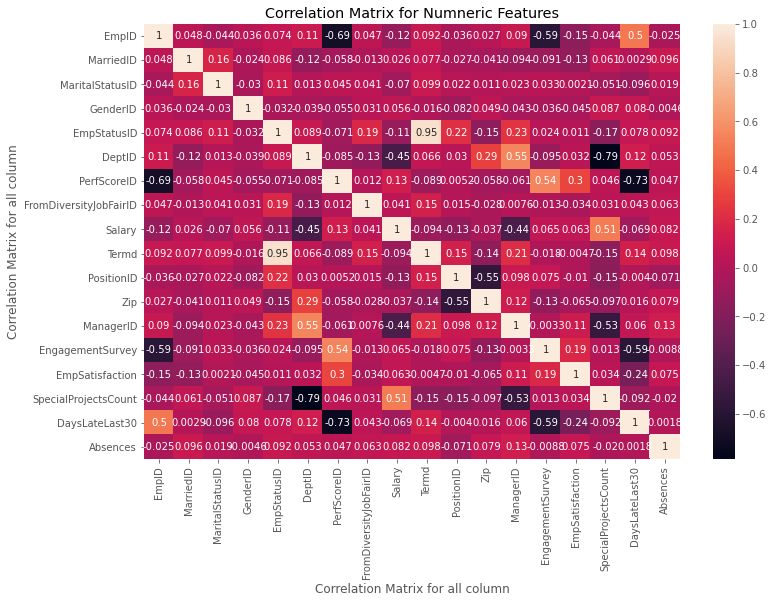

In [52]:
#let's get the correction between Gender and Postion in the company by using visualization.
correlation_matrix = df.corr(method='pearson')

sns.heatmap(correlation_matrix, annot=True)
plt.title('Correlation Matrix for Numneric Features')
plt.xlabel('Correlation Matrix for all column')
plt.ylabel('Correlation Matrix for all column')
plt.show

# Conclusions:
1. The recruiment source with the highest hire.
    :indeed has is the highest hiring source with 87 hires while LinkedIn comes in second with 76 hires.
2. What position has the highest hire.
    :Production Technician I has 137 hires, followed by Production Technician II.
3. Calculate the ratio of male and female hires.
    :There are 176 females employees and 135 male employees, therefore, there are more female employee.
4. Get the correlation between gender and position.
    : There is a negative correlation between Gender(Sex) and Salary in the company, as our correlation analysis of Gender vs Salary is a very low 0.056.